# Stock Prediction :
#Take stock price of any company you
#want and predicts its price by using LSTM.
#Use only Jupyter notebook code.

[*********************100%%**********************]  1 of 1 completed
Epoch 1/100
12/12 [==============================] - 4s 33ms/step - loss: 0.0616
Epoch 2/100
12/12 [==============================] - 0s 32ms/step - loss: 0.0094
Epoch 3/100
12/12 [==============================] - 0s 32ms/step - loss: 0.0044
Epoch 4/100
12/12 [==============================] - 0s 32ms/step - loss: 0.0030
Epoch 5/100
12/12 [==============================] - 0s 31ms/step - loss: 0.0021
Epoch 6/100
12/12 [==============================] - 0s 34ms/step - loss: 0.0017
Epoch 7/100
12/12 [==============================] - 0s 28ms/step - loss: 0.0016
Epoch 8/100
12/12 [==============================] - 0s 30ms/step - loss: 0.0015
Epoch 9/100
12/12 [==============================] - 0s 30ms/step - loss: 0.0015
Epoch 10/100
12/12 [==============================] - 0s 30ms/step - loss: 0.0015
Epoch 11/100
12/12 [==============================] - 0s 30ms/step - loss: 0.0017
Epoch 12/100
12/12 [==================

12/12 [==============================] - 0s 31ms/step - loss: 6.4881e-04
Epoch 98/100
12/12 [==============================] - 0s 31ms/step - loss: 6.9092e-04
Epoch 99/100
12/12 [==============================] - 0s 31ms/step - loss: 6.4552e-04
Epoch 100/100
3/3 [==============================] - 1s 13ms/step


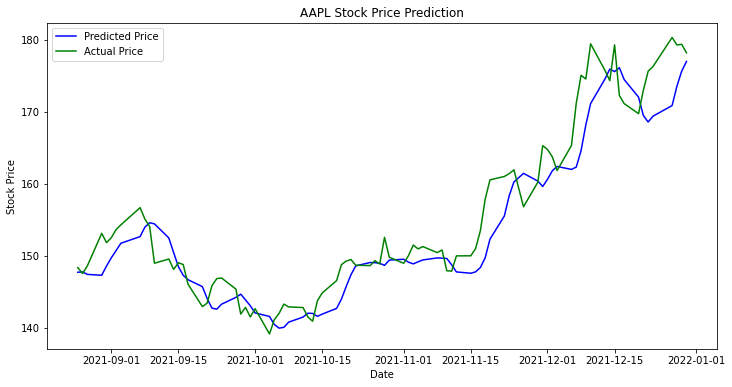

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the stock symbol and date range
stock_symbol = "AAPL"  # Replace with the symbol of the company you want
start_date = "2020-01-01"
end_date = "2021-12-31"

# Download historical stock price data from Yahoo Finance
df = yf.download(stock_symbol, start=start_date, end=end_date)

# Select the 'Close' price as the target variable
data = df[['Close']]

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Create sequences for training data
sequence_length = 60  # You can adjust this window size
X = []
y = []
for i in range(sequence_length, len(data)):
    X.append(data_scaled[i - sequence_length:i, 0])
    y.append(data_scaled[i, 0])

X, y = np.array(X), np.array(y)

# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=100)

# Evaluate the model on test data
test_predictions = model.predict(X_test)
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the predictions vs. actual prices
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(test_predictions):], test_predictions, label='Predicted Price', color='blue')
plt.plot(df.index[-len(test_predictions):], y_test, label='Actual Price', color='green')
plt.title(f'{stock_symbol} Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
